In [2]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

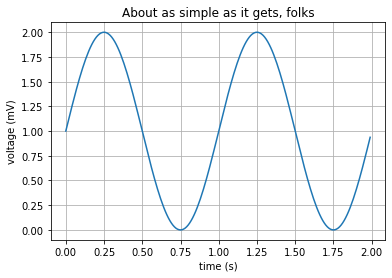

In [5]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [7]:
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if not start in graph:
        return []
    paths = []

    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)

    return paths


def create_matrices(nodes, times=3):
    matrices = set()
    while len(matrices) < times:
        matrix = [[random.randint(0, 1) for i in range(nodes)]
                  for j in range(nodes)]
        for i in range(nodes):
            matrix[i][i] = 0
            matrix[i][0] = 0
            matrix[nodes-1][i] = 0
        for i in range(nodes):
            matrix[i] = tuple(matrix[i])
        matrices.add(tuple(matrix))

    return matrices


def create_graphs(nodes, times):
    matrices = create_matrices(nodes, times)
    graphs = []
    for matrix in matrices:
        graph = defaultdict(list)
        for i in range(nodes):
            for j in range(nodes):
                if matrix[i][j] == 1:
                    graph[i].append(j)
        graphs.append(graph)
    return graphs


def create_paths(nodes=5, times=5):
    graphs = create_graphs(nodes, times)
    new_graph = dict()
    for (i, graph) in enumerate(graphs):
        print(graph)
        all_paths = set()
        graph_paths = find_all_paths(graph, 0, nodes-1)
        for path in graph_paths:
            all_paths.add(tuple(path))
        new_graph[i] = (graph, all_paths)

    return new_graph


def print_paths(graphs):
    for i in range(len(graphs)):
        structure = graphs[i][0]
        paths = graphs[i][1]

        print("Structure of Graph #" + str(i))
        G = nx.DiGraph()
        G.add_nodes_from(dict(structure).keys())
        for (key, vals) in dict(structure).items():
            for val in vals:
                G.add_edge(*(key, val))

        print(G.edges())
        print(dict(structure))

        nx.draw(G)
        plt.show()
        break

    # for path in paths:
    #     print(" ~> ".join([str(x) for x in path]))

In [15]:
paths = create_paths()

defaultdict(<class 'list'>, {0: [2], 1: [2, 3], 2: [1, 4], 3: [1, 2]})
defaultdict(<class 'list'>, {0: [4], 1: [2, 3, 4], 2: [3, 4], 3: [4]})
defaultdict(<class 'list'>, {0: [3], 1: [4], 2: [3, 4], 3: [1, 2]})
defaultdict(<class 'list'>, {0: [4], 1: [2, 3], 3: [4]})
defaultdict(<class 'list'>, {0: [1, 3], 1: [2, 3, 4], 2: [1, 3]})


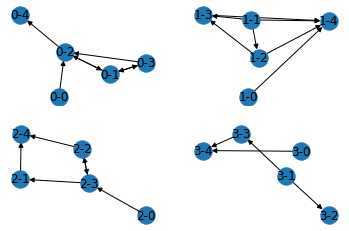

In [30]:
for i in range(min(len(paths), 4)):
    G = nx.DiGraph()
    structure = paths[i][0]
    possible_paths = paths[i][1]
    graph_nodes = [str(i) + "-" + str(x) for x in dict(structure).keys()]
    G.add_nodes_from(graph_nodes)
    for (key, vals) in dict(structure).items():
        for val in vals:
            G.add_edge(*(str(i) + "-" + str(key), str(i) + "-" + str(val)))
    sub = 221 + i
    plt.subplot(sub)
    nx.draw(G, with_labels=True)
   
    

In [31]:
!jupyter nbconvert --to script Untitled.ipynb

[NbConvertApp] Converting notebook Untitled.ipynb to script
[NbConvertApp] Writing 3099 bytes to Untitled.py
